**Copyright: © NexStream Technical Education, LLC**.  
All rights reserved

# **Part 1:  From scratch K-means Implementation**
See the following cells as a guide to implementing Kmeans WITHOUT the use of any clustering library functions.

## Part 1a:  Helper functions
In this section you will set up your script and create a few helper functions for use with your K-means implementation.  





*   Import relevant libraries (provided)
*   Create a test linear dataset (provided)
*   Implement a euclidean distance calculator function to calculate a vector of distances from single point to an array of points.  

**def calcdist(point, data):**  
inputs: point = single point, data = array of points
return: array of distances

In [ ]:
#Import relevant libraries
import random
import numpy as np
from numpy.random import uniform
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
from sklearn.datasets._samples_generator import make_blobs
from sklearn.datasets._samples_generator import make_moons
import seaborn as sns
import doctest
%matplotlib inline

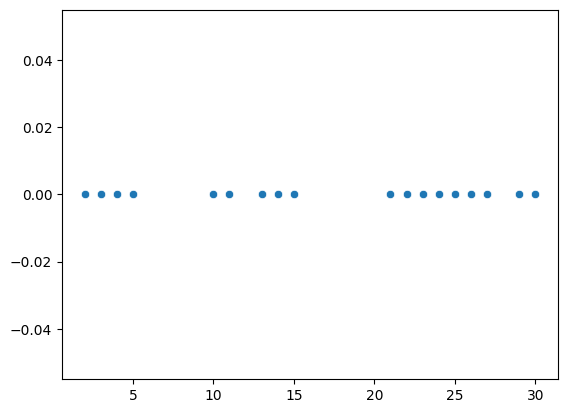

In [ ]:
#Create a test linear dataset
#Run this cell for test purposes
data = np.array([[2,0],[3,0],[4,0],[5,0],[10,0],[11,0],\
              [13,0],[14,0],[15,0],[21,0],[22,0],[23,0],\
              [24,0],[25,0],[26,0],[27,0],[29,0],[30,0]])
sns.scatterplot(x=data[:,0], y=data[:,1])
plt.show()

In [ ]:
#Calculate euclidean distances between a point and the dataset
# def calcdist(point, data):
#   inputs: point = single point, data = array of points
#   return: array of distances
def calcdist(point, data):
    distances = np.sqrt(np.sum((data - point) ** 2, axis=1))
    return distances

In [ ]:
#Test the distance calculator function
testpoint = np.array([0,0])
#print(calcdist(testpoint, data))
testpoint2 = np.array([-1, 5])
#print(calcdist(testpoint2, data))


import doctest
"""
   >>> print(calcdist(testpoint, data))
   [ 2.  3.  4.  5. 10. 11. 13. 14. 15. 21. 22. 23. 24. 25. 26. 27. 29. 30.]
   >>> print(np.round(calcdist(testpoint2, data), 2))
   [ 5.83  6.4   7.07  7.81 12.08 13.   14.87 15.81 16.76 22.56 23.54 24.52
    25.5  26.48 27.46 28.44 30.41 31.4 ]
"""

doctest.testmod()


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.10/doctest.py", line 1501, in run
    sys.settrace(save_trace)



TestResults(failed=0, attempted=2)

Implement visualization function to plot the data along with the calculated cluster centroid positions.
Generate a random test data point, draw a marker (i.e. a line) from the test point to the best centroid position representing the assigned class, and return the assigned class.  
<br>

**def plot_clusters**(data, labels, num_clusters, center_coords):  
inputs:
  * data = input dataset
  * num_clusters = number of calculated clusters in the data
  * labels = array mapping each datapoint to a cluster index [0..num_clusters-1].
         Example, labels [0 1 0 1 0 2 0 0 0 0 1 0 0 2 0] maps the following:
                   data[0] --> cluster 0
                   data[1] --> cluster 1
                   data[2] --> cluster 0
                   data[5] --> cluster 2
                   etc.
  * center_coords = coordinates of the cluster centers

return: centroid coordinate that a randomly generated test point belongs to

  <br>

  Your function should display the clusters in different colors, a marker for the cluster center (centroid) position, and a marker from a randomly generated test point mapped to the best (nearest) cluster.  

![alt text](https://drive.google.com/uc?id=1tRVT9d2vj6yZAJLJQHbekA1xxPCAZAzg)

![alt text](https://drive.google.com/uc?id=1dw3tDYAt4x5115Xn4Viq-oC1Ew2Paeud)



In [ ]:
#Function to plot color-coded clusters, and cluster centers
# def plot_clusters(data, labels, num_clusters, cluster_centers):
#     data = input dataset
#     num_clusters = number of calculated clusters
#     labels = array mapping each datapoint to a cluster.
#     cluster_centers = coordinates of the cluster centers
#     return: centroid coordinate that the test point belongs to
#
#     Algorithm:
#         Create a list of colors to separate the cluster colors
#         Loop through the number of clusters
#             set the cluster color by indexing into the list of colors
#             Loop through the dataset
#               assign the data to the cluster color if its label is in the cluster
#             Plot the data in the cluster
#         Mark each cluster center on the plot
#         Generate a random point within the domain min and max of the data
#         Calculate the min distance to the cluster centers
#         Plot a line to from the random point to the cluster center
#         Return the coordinates of the cluster the random point belongs to

def plot_clusters(data, labels, num_clusters, cluster_centers):

    # Find number of data points
    n_points = len(data)

    #Create a list of colors to separate the cluster colors
    plot_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    #Set up the figure size
    plt.figure(figsize=(10, 7))

    #Offset the labels by 1 (add 1)
    #This will reserve index 0 for noise points (for future use in DBSCAN).
    scaled_labels = labels+1
#    print(scaled_labels)

    # Loop through the number of clusters
    for i in range(num_clusters):
        #if noise point (index 0) then assign color to 'black'
        if i == 0:
            color='black'
        #else assign distinct color to a cluster from your color list
        #Hint: index into your color list using mod operator
        else:
            color = plot_colors[i % len(plot_colors)]
#            print('color:', color)

        #Loop through dataset
        #cluster_points = [data[j] for j in range(n_points) if scaled_labels[j] == i]
        #cluster_points = np.array(cluster_points)

        cluster_indices = np.where(scaled_labels == i)[0]
        cluster_points = data[cluster_indices]

        #for None in None:
            #assemble array of points belonging to a distinct cluster
            #YOUR CODE HERE

        #Plot the cluster on a scatter plot
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, label=f'Cluster {i}')

        #Mark each cluster center on the plot
        #Hint: use list comprehension inside the plot function
        plt.plot(cluster_centers[i][0], cluster_centers[i][1], '+', color='black', markersize=30)

    #Plot a random point and classify it with line to the cluster it belongs to.
    min_ = np.min(data, axis=0)
    max_ = np.max(data, axis=0)
#    print('min, max:', min_, max_)

    #Generate a random test point between the min and max X-coords (axis=0)
    d1 = np.random.uniform(min_[0], max_[0])
    d2 = np.random.uniform(min_[1], max_[1])
#    print('Test point:', d1)

    #Calculate the distances from the test point to the cluster centers
    #and find the minimum distance (i.e. the cluster the test point belongs to)
    #Use your calcdist function
    test_point = np.array([d1, d2])
    dists = [np.linalg.norm(test_point - center) for center in cluster_centers]
    min_dist_centroid = np.argmin(dists)
#    print('Distances:', dists)
#    print('Best centroid to test point:', min_dist_centroid)

    #Plot the test point
    plt.plot(d1, d2, '.', markersize=20, color='red' )

    #Plot a line from the test point to the cluster it belongs to
    plt.plot([d1, cluster_centers[min_dist_centroid][0]],
             [d2, cluster_centers[min_dist_centroid][1]],
             linestyle='--', color='black')

    plt.title('K-means Clustering')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Return the centroid coordinate that the test point belongs to
    return cluster_centers[min_dist_centroid]



centroid coordinates: [[ 3.5   0.  ]
 [12.6   0.  ]
 [25.22  0.  ]]


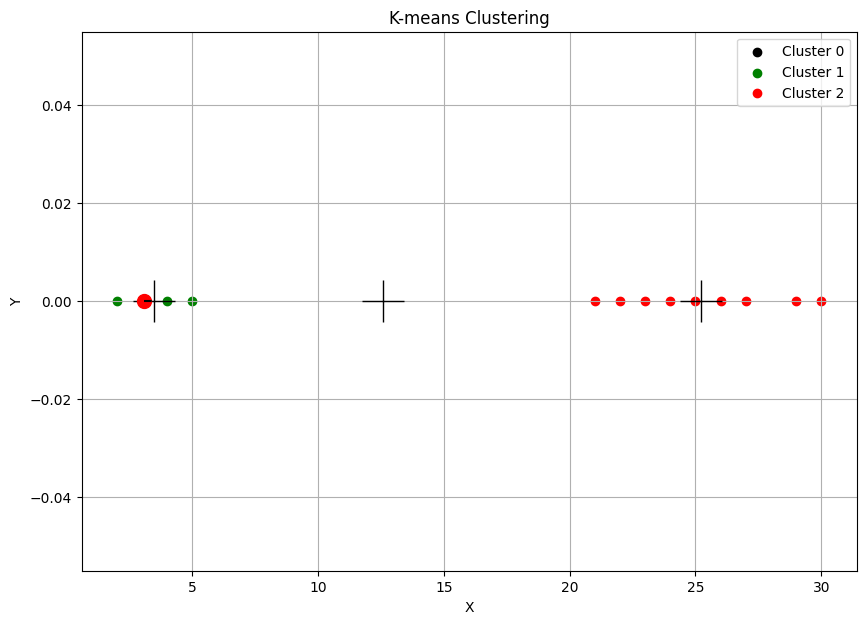

array([3.5, 0. ])

In [ ]:
#Test your plotting function (linear data)
data = np.array([[2,0],[3,0],[4,0],[5,0],[10,0],[11,0],\
              [13,0],[14,0],[15,0],[21,0],[22,0],[23,0],\
              [24,0],[25,0],[26,0],[27,0],[29,0],[30,0]])
centers = np.array([[3.5, 0.], [3.5, 0.], [3.5, 0.], [3.5, 0.],
                    [12.6, 0.], [12.6, 0.], [12.6, 0.], [12.6, 0.], [12.6, 0.],
                    [25.22, 0.], [25.22, 0.], [25.22, 0.], [25.22, 0.],
                    [25.22, 0.], [25.22, 0.], [25.22, 0.], [25.22, 0.], [25.22, 0.]])
labels = np.array([0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1])

center_coords = np.unique(centers, axis=0)
print('centroid coordinates:', center_coords)
plot_clusters(data, labels, 3, center_coords )

centroid coordinates: [[-4.24  0.21]
 [ 0.81  3.86]
 [ 7.55  8.12]]


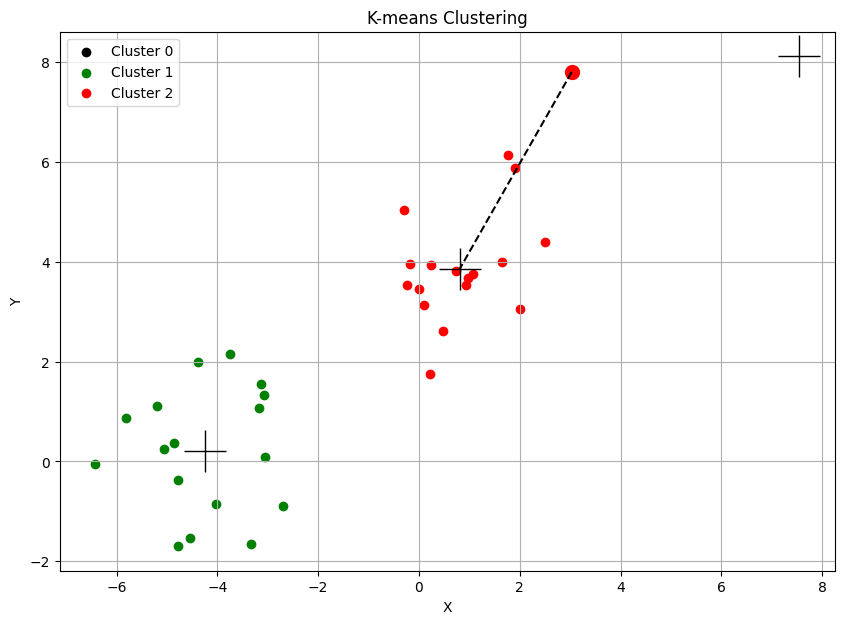

array([0.81, 3.86])

In [ ]:
#Test your plotting function (blobs data)
centers = 3
data, blob = make_blobs(n_samples=50, centers=centers, cluster_std=1, random_state=3)
centers = np.array([[-4.24,  0.21], [0.81, 3.86], [7.55, 8.12], [0.81, 3.86], [-4.24,  0.21],
                          [7.55, 8.12], [0.81, 3.86], [-4.24,  0.21], [-4.24,  0.21], [-4.24,  0.21],
                          [0.81, 3.86], [-4.24,  0.21], [0.81, 3.86], [-4.24,  0.21], [7.55, 8.12],
                          [-4.24,  0.21], [7.55, 8.12], [7.55, 8.12], [7.55, 8.12], [0.81, 3.86],
                          [-4.24,  0.21], [0.81, 3.86], [0.81, 3.86], [0.81, 3.86], [0.81, 3.86],
                          [-4.24,  0.21], [0.81, 3.86], [7.55, 8.12], [0.81, 3.86], [-4.24,  0.21],
                          [-4.24,  0.21], [-4.24, 0.21], [7.55, 8.12], [7.55, 8.12], [-4.24, 0.21],
                          [0.81, 3.86], [7.55, 8.12], [7.55, 8.12], [7.55, 8.12], [0.81, 3.86],
                          [0.81, 3.86], [7.55, 8.12], [0.81, 3.86], [-4.24,  0.21], [-4.24,  0.21],
                          [0.81, 3.86], [-4.24, 0.21], [7.55, 8.12], [7.55, 8.12], [7.55, 8.12]])
labels = np.array([0, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 0, 2, 2, 2, 1,
                   0, 1, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0, 2, 2, 0, 1, 2, 2, 2, 1,
                   1, 2, 1, 0, 0, 1, 0, 2, 2, 2])

center_coords = np.unique(centers, axis=0)
print('centroid coordinates:', center_coords)
plot_clusters(data, labels, 3, center_coords )


##Part 1b: K-means implementation  
Follow the reference script to create YOUR OWN implementation of K-means (not using Scikit-learn or other machine learning libraries which include Kmeans functions).  The script will provide the linear dataset which was covered in the lecture notes.  
- Implement a class and supporting methods/functions to generate an n-cluster model from the dataset.  See the provided code template for a step-by-step guide.  Use the full dataset provided in the script (do not perform a train/test split).  Your final code will generate the cluster center (centroid) locations as described in the lecture notes:  [ [25.2, 0], [3.5, 0], [12.6, 0] ].
- You may call your function with the number of clusters set to 3; i.e. no need to find the optimal number of clusters using an elbow or other method.
- Implement a class called Kmeans with constructor, fit(), and evaluate() functions. See the provided script for a step-by-step guide.
- Test your code with at least 2 new data points and record the cluster/class they would be assigned, (i.e. classify your test point by determnining which output class the test points are assigned to).




**Implement the KMeans class**

<br>

Algorithm:  

1. Randomly place K markers (called centroids), one for each cluster.  

2. Calc the Euclidean distance of each point from the centroid. Note, we typically normalize the features that are used to define the dataset so that one parameter doesn't dominate the distance calc.  

3. Assign each data point (object) to its closest centroid, creating a cluster.  

4. Recalculate the position of the K centroids.  

5. Repeat steps 2-4 until the centroids no longer move.  

6. Calculate variances then repeat steps 1-5 using K new randomly placed centroids for N user defined iterations are complete.  

7. Assign the data to clusters which had the smallest saved variance.  

<br>

Constructor:  
**def __init__(self, n_clusters=3, max_iter=800):**
- Initialize instance variables for the number of clusters, max iterations, the current centroid locations, and best centroid locations


Fit method:  
**def fit(self, X_train):**    

**1**. Randomly place K markers (called centroids), one for each cluster.  
   - Compute min, max in X_train. Hints:   
   https://numpy.org/doc/stable/reference/generated/numpy.minimum.html
   https://numpy.org/doc/stable/reference/generated/numpy.maximum.html  
   - Init centroids = uniform distributed between min and max for all n_clusters.  Hints:  
   https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html
   - Initialize iteration count = 0, and previous centroids = empty  

- Loop over the max iterations *(while iteration < max_iter:)*
     - Create an empty list of sorted points for each of the clusters.  Hint:  
        *list_of_lists = [[] for _ in range(n)]*, where n is the number of clusters
     - Loop over the datapoints in X_train

      **2**. Calc the distance from each data point to the centroid.  Hints:  
      Call calcdist() to calculate distance between datapoint and each of the centroids and find the index of the centroid with that minimum distance.  
      https://numpy.org/doc/stable/reference/generated/numpy.argmin.html

      **3**. Assign each data point (object) to its closest centroid, creating a cluster.  Hint:  
      https://numpy.org/doc/stable/reference/generated/numpy.append.html

  **4**. Recalculate the position of the K centroids.  
   - Update previous centroids = current centroids
   - Calc the mean of the points assigned to the centroid cluster from step 3.  Make sure to check for nan's in case no points where assigned to the centroid, and in that case set the centroid to the previous centroid.

  **5**. Increment *iteration*
  
  **6**. Calculate variances then Repeat steps 1-5 using K new randomly placed centroids for N user defined iterations are complete.  


<br>

Evaluate method:  
**def evaluate(self, X):**  
- Classify test points based on the minimum distance to the cluster centers (centroids).  e.g. create an array of centroid indices aligned to X
- for each x in X
  - calculate the distances to all the centroids
  - find the centroid with the minimimum distance
  - append the centroid index with minimum distance to the array


In [ ]:
#Kmeans class

class KMeans:
  # __init__ is the class constructor
  def __init__(self, n_clusters=3, max_iter=800):
    self.n_clusters = n_clusters
    self.max_iter = max_iter
    self.centroids = None
    self.best_centroids = None

  #fit() trains the model by finding the best cluster center (centroid) in the dataset
  # Find the min, max in X_train domain to bound the centroid random assignment
  # Loop over the number of iterations
  #   Place centroids at random positions
  #   Loop while current centroid positions != previous centroid positions
  #      Loop over data
  #         Calculate distance from data point to each centroid
  #         Find the min distance and assign data to that centroid
  #      Calc mean position over data (cluster) assigned to each centroid
  #      Update position of centroid to the mean
  #      If updated centroid contains no data then revert to prev_centroids
  #      Else update previous centroid positions to current centroid positions
  #   Calc variance over data (cluster) assigned to each centroid
  #   Calc total variance = Sum of variances for each cluster
  #   If total variance < min total variance then update min total variance

  def fit(self, X_train):
    #Randomly select centroid start points, uniformly distributed across the domain of the dataset
    #Find the min, max in X_train domain to bound the centroid random assignment
    #Init an iteration counter
    #Init the minimum centroid variance (to big value) so can update with smallest variance
    #Init the best centroid locations
    min_, max_ = np.min(X_train, axis=0), np.max(X_train, axis=0)
    iteration = 0
    min_centroid_variance = float('inf')
    self.best_centroids = None

    #Init  previous centroids to check if new centroids == previous (so can stop search)
    prev_centroids = None

    #Loop over number of iterations
    while iteration < self.max_iter:
      # Step 1
      #Initialize the centroids to random coordinates
      self.centroids = np.random.uniform(min_, max_, (self.n_clusters, X_train.shape[1]))

#      print('\n--------- Iteration:', iteration, '-------------' )
#      print('Randomly assigned centroids:', self.centroids)
#      print('shape of centroids 2: ', np.shape(self.centroids))

      #Steps 2 - 5
      #While previous centroids not equal current centroids
      while not np.array_equal(prev_centroids, self.centroids):
        # Update the previous centroids to the current
        prev_centroids = np.copy(self.centroids)

        # Sort each data point, assigning to nearest centroid
        # Init an empty sorted points array of size = num of clusters
        sorted_points = [[] for _ in range(self.n_clusters)]

        #Loop over each data point
        for point in X_train:
          #Step 2
          #Calculate the distances from data point to centroids (call your calcdist function)
          dists = calcdist(point, self.centroids)
          #Calculate the best centroid index (minimum distance)
          centroid_idx = np.argmin(dists)
          #Step 3
          #Assign the data point to an array indexed by the best centroid index
          sorted_points[centroid_idx].append(point)
#        print('Sorted points before updating centroid positions:', sorted_points)

        #Reposition the centroids to the mean of the assigned data points
        #Hint: can use np.nanmean to ignore nan's for points not assigned to a centroid
        #Step 4
        for i in range(self.n_clusters):
          if sorted_points[i]:
            self.centroids[i] = np.mean(sorted_points[i], axis=0)
        #self.centroids = None
#        print('Updated centroids position (after mean calculation):', self.centroids)

        #Check if any of the centroids has no points assigned, and if so then update to previous centroid
        for i, centroid in enumerate(self.centroids):
          #Catch any np.nans, resulting from a centroid having no points - this will generate a runtime warning
          if np.isnan(centroid).any():
#            print('****** Found nan so using previous centroid******')
            #Centroids = previous centroids
            self.centroids[i] = prev_centroids[i]

#        print('Final centroids in search: ', self.centroids)

      #Step 6
      total_cluster_var = 0
      cluster_count = 1

      #Calculate the individual and total cluster variances
      #for None in None:
       # cluster_var = None
      for points in sorted_points:
        if points:
          cluster_var = np.var(points)
          total_cluster_var += cluster_var
#        print('Cluster variance: ', cluster_var)
        #Calculate the accumulated cluster variance
          total_cluster_var = cluster_var
#        print('Accumulated Cluster variance:', total_cluster_var)
      #If total cluster variance < min cluster variance, then update min cluster variance
      if total_cluster_var < min_centroid_variance:
        min_centroid_variance = total_cluster_var
        self.best_centroids = self.centroids
      #Increment iteration
      cluster_count += 1
      iteration += 1

#      print('Min variance:', min_centroid_variance)
#      print('Centroids with min variance', self.best_centroids)

  #evaluate() classifies test points based on the minimum distance to the centroids
  def evaluate(self, X):
    #Initialize empty arrays to store the centroid index and centroid position for each of the data points
    centroids = []
    centroid_idxs = []

    #Loop of all points in X
    for point in X:
      #Calculate the distance from the data point to each of the best_centroids
      #Use your calcdist function
      #dists = None

      #Find the centroid index with the minimum distance
      #centroid_idx = None

      #Add the centroid position and index to the centroids and centroid_idxs arrays
      #centroids = None
      #centroid_idxs = None

      dists = calcdist(point, self.best_centroids)
      centroid_idx = np.argmin(dists)
      centroids.append(self.best_centroids[centroid_idx])
      centroid_idxs.append(centroid_idx)

    return centroids, centroid_idxs

##Part 1c: Test your 'from-scratch' model


**1-D (linear) dataset**  

Use the provided dataset to fit your model and plot the clustered data with centers marked and a test point marked to its nearest cluster.

In [ ]:
#Instantiate a KMeans object from your class implementation in Part 1b.
#Set the number of clusters to 3, and the number of iterations to 50.
import numpy as np
data = np.array([[2,0],[3,0],[4,0],[5,0],[10,0],[11,0],\
              [13,0],[14,0],[15,0],[21,0],[22,0],[23,0],\
              [24,0],[25,0],[26,0],[27,0],[29,0],[30,0]])

#Instantiate a KMeans object (using your implementation from part 1b)
kmeans = KMeans(n_clusters=3, max_iter=50)

#Fit the data
kmeans.fit(data)

# View results
#Evaluate the test data
class_centers, classification = kmeans.evaluate(data)


import doctest
"""
   >>> print(np.sort(np.ravel(kmeans.best_centroids)))
   [ 0.          0.          0.          3.5        12.6        25.22222222]
"""

doctest.testmod()


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.10/doctest.py", line 1501, in run
    sys.settrace(save_trace)



TestResults(failed=0, attempted=1)

Cluster centers [array([3.5, 0. ]), array([3.5, 0. ]), array([3.5, 0. ]), array([3.5, 0. ]), array([12.6,  0. ]), array([12.6,  0. ]), array([12.6,  0. ]), array([12.6,  0. ]), array([12.6,  0. ]), array([25.22222222,  0.        ]), array([25.22222222,  0.        ]), array([25.22222222,  0.        ]), array([25.22222222,  0.        ]), array([25.22222222,  0.        ]), array([25.22222222,  0.        ]), array([25.22222222,  0.        ]), array([25.22222222,  0.        ]), array([25.22222222,  0.        ])]
Cluster labels: [2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]


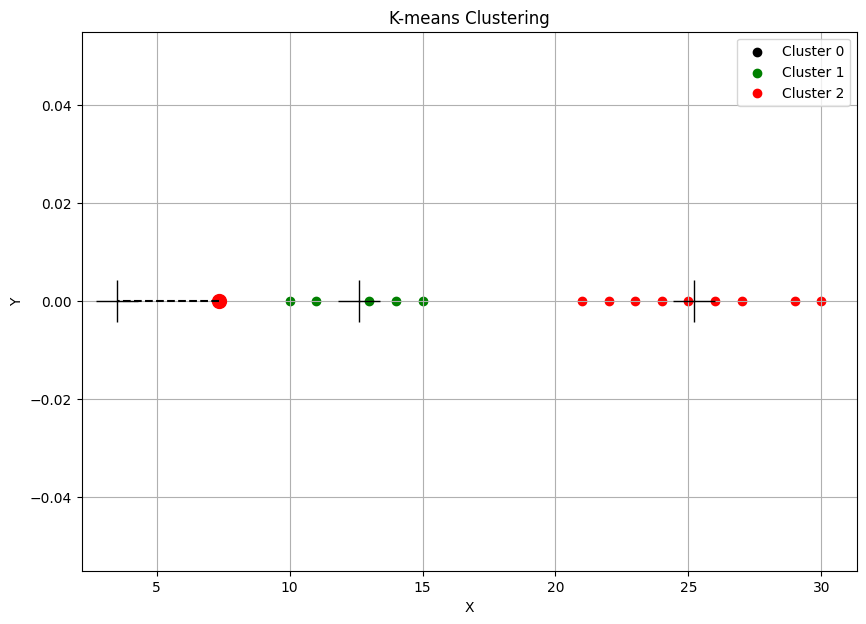

kmeans best centroids: [[12.6         0.        ]
 [25.22222222  0.        ]
 [ 3.5         0.        ]]
Test point belongs to centroid at: [3.5 0. ]


In [ ]:
#Visualize the dataset with cluster centers and test point mapped to best cluster center

print('Cluster centers', class_centers)
print('Cluster labels:', classification)
labels = np.array(classification)

class_coord = plot_clusters(data, labels,3, kmeans.best_centroids)

print('kmeans best centroids:', kmeans.best_centroids)
print('Test point belongs to centroid at:', class_coord)



**Reflect on your results**.  
Make sure you run the Visualization cell above enough times to verify randomly generated test points assigned to each of the clusters.

<br>


**2-d (Blobs) dataset**

- Create at least 2 datasets of 3 clusters each.  The script will use the Scikit-learn ‘make_blobs’ function to produce specific test datasets for you, but you should also experiment with different numbers of clusters and different standard deviation settings.  Note, the script will set a 'random_state' to create 2 known datasets, you must use those datasets in your testing so that the doctests pass.
- Implement your code to create 3 clusters from the dataset.  See the code template for a step-by-step guide.  Use the full dataset provided in the script (do not perform a train/test split).
- Test your code with at least 2 new data points and record the cluster they would be assigned, i.e. output class.  
- Upload a screenshot of your test outputs.  Show a plot of the dataset overlaid with the cluster centroid positions, and a line connecting the test point to the selected cluster.


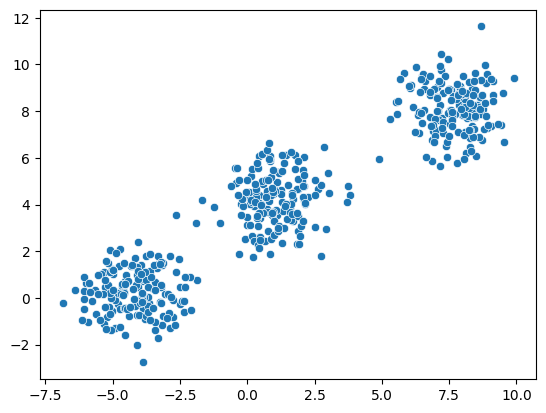

In [ ]:
#Construct a blob dataset 1
# DO NOT change the make_blob function parameters.

centers = 3
data, blob = make_blobs(n_samples=500, centers=centers, cluster_std=1, random_state=3)
sns.scatterplot(x=data[:,0], y=data[:,1])
plt.show()

In [ ]:
#Instantiate a KMeans object from your class implementation in Part 1b.
#Set the number of clusters to 3, and the number of iterations to 50.
kmeans = KMeans(n_clusters=3,max_iter=50)

#Fit the data
kmeans.fit(data)

#Evaluate the test data
class_centers, classification = kmeans.evaluate(data)


import doctest
"""
   >>> print(np.sort(np.ravel(kmeans.best_centroids)))
   [-4.18726897  0.27543154  1.01450711  4.20318963  7.67197216  8.11134342]
"""

doctest.testmod()

TestResults(failed=0, attempted=1)

Cluster centers [array([-4.18726897,  0.27543154]), array([1.01450711, 4.20318963]), array([-4.18726897,  0.27543154]), array([1.01450711, 4.20318963]), array([-4.18726897,  0.27543154]), array([7.67197216, 8.11134342]), array([-4.18726897,  0.27543154]), array([-4.18726897,  0.27543154]), array([-4.18726897,  0.27543154]), array([-4.18726897,  0.27543154]), array([1.01450711, 4.20318963]), array([-4.18726897,  0.27543154]), array([-4.18726897,  0.27543154]), array([7.67197216, 8.11134342]), array([-4.18726897,  0.27543154]), array([-4.18726897,  0.27543154]), array([-4.18726897,  0.27543154]), array([-4.18726897,  0.27543154]), array([7.67197216, 8.11134342]), array([7.67197216, 8.11134342]), array([1.01450711, 4.20318963]), array([1.01450711, 4.20318963]), array([-4.18726897,  0.27543154]), array([-4.18726897,  0.27543154]), array([7.67197216, 8.11134342]), array([-4.18726897,  0.27543154]), array([7.67197216, 8.11134342]), array([1.01450711, 4.20318963]), array([7.67197216, 8.111343

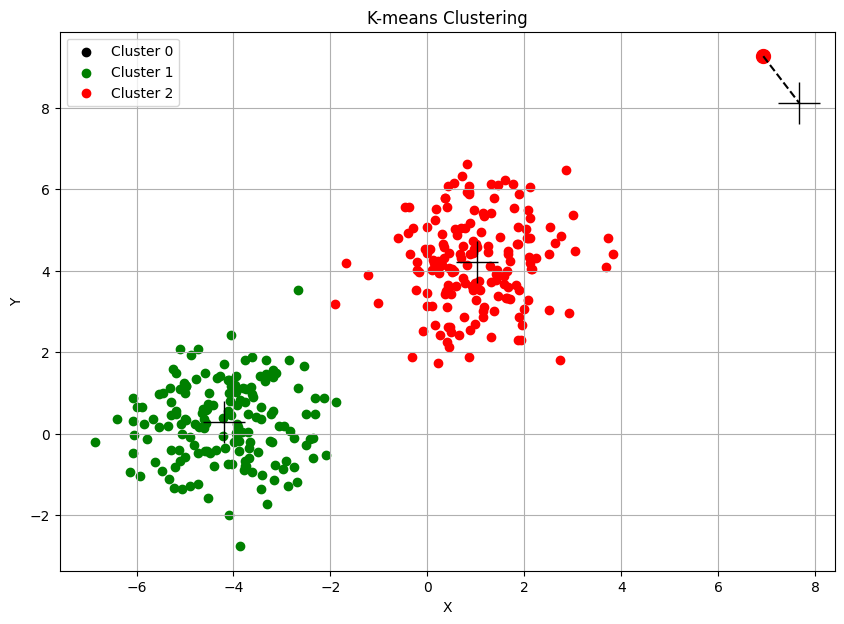

kmeans best centroids: [[-4.18726897  0.27543154]
 [ 1.01450711  4.20318963]
 [ 7.67197216  8.11134342]]
Test point belongs to centroid at: [7.67197216 8.11134342]


In [ ]:
#Visualize the dataset with cluster centers and test point mapped to best cluster center
#Use your own function or the provided function calls (based on the previous plot functions)

print('Cluster centers', class_centers)
print('Cluster labels:', classification)
labels = np.array(classification)


class_coord = plot_clusters(data, labels, 3, kmeans.best_centroids )
print('kmeans best centroids:', kmeans.best_centroids)
print('Test point belongs to centroid at:', class_coord)



**Reflect on your results**.  
Make sure you run the Visualization cell above enough times to verify randomly generated test points assigned to each of the clusters.  

<br>


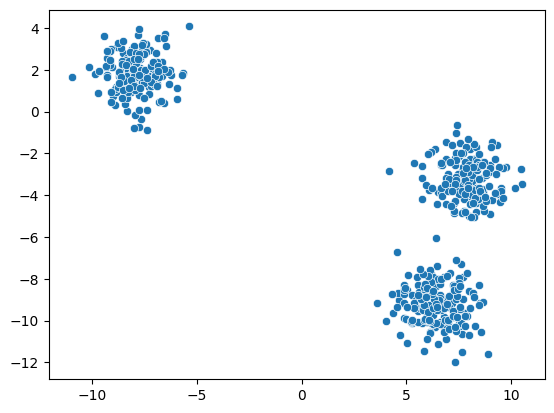

In [ ]:
#Construct a blob dataset 2
# DO NOT change the make_blob function parameters.
centers = 3
data, blob = make_blobs(n_samples=500, centers=centers, cluster_std=1, random_state=6)
sns.scatterplot(x=data[:,0], y=data[:,1])
plt.show()

In [ ]:
#Instantiate a KMeans object from your class implementation in Part 1b.
#Set the number of clusters to 3, and the number of iterations to 50.

kmeans = KMeans(n_clusters=3, max_iter=50)

#Fit the data
kmeans.fit(data)

#Evaluate the test data
class_centers, classification = kmeans.evaluate(data)


#NOTE - there are no doctests for this dataset since Kmeans will likely not consistently
#       cluster the data properly.

Cluster centers [array([ 7.15948124, -6.25225734]), array([-7.62360119,  1.09643449]), array([-8.16211783,  2.52075524]), array([-8.16211783,  2.52075524]), array([ 7.15948124, -6.25225734]), array([ 7.15948124, -6.25225734]), array([ 7.15948124, -6.25225734]), array([-7.62360119,  1.09643449]), array([ 7.15948124, -6.25225734]), array([ 7.15948124, -6.25225734]), array([ 7.15948124, -6.25225734]), array([ 7.15948124, -6.25225734]), array([ 7.15948124, -6.25225734]), array([ 7.15948124, -6.25225734]), array([ 7.15948124, -6.25225734]), array([ 7.15948124, -6.25225734]), array([-8.16211783,  2.52075524]), array([ 7.15948124, -6.25225734]), array([ 7.15948124, -6.25225734]), array([ 7.15948124, -6.25225734]), array([ 7.15948124, -6.25225734]), array([ 7.15948124, -6.25225734]), array([ 7.15948124, -6.25225734]), array([ 7.15948124, -6.25225734]), array([ 7.15948124, -6.25225734]), array([-8.16211783,  2.52075524]), array([-7.62360119,  1.09643449]), array([ 7.15948124, -6.25225734]), arr

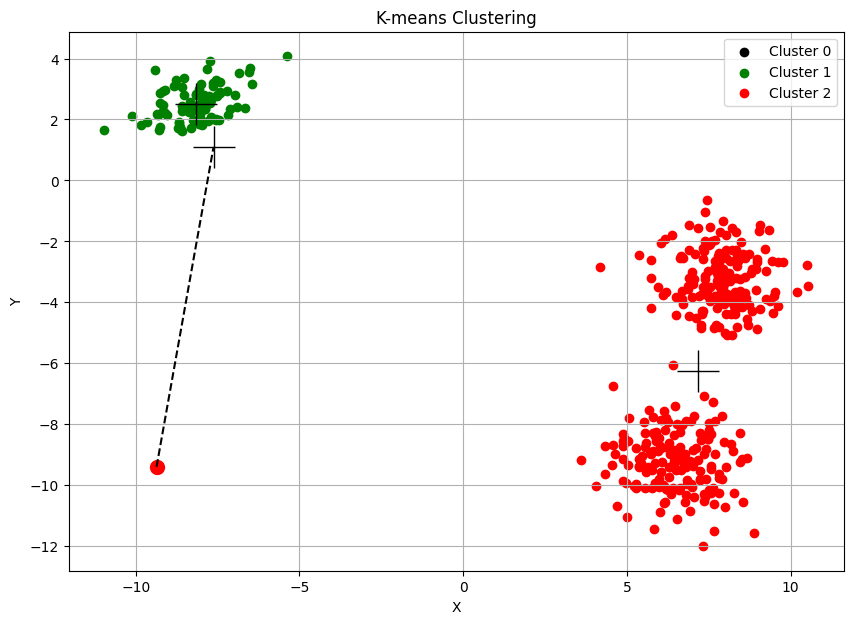

kmeans best centroids: [[-8.16211783  2.52075524]
 [ 7.15948124 -6.25225734]
 [-7.62360119  1.09643449]]
Test point belongs to centroid at: [-7.62360119  1.09643449]


In [ ]:
#Visualize the dataset with cluster centers and test point mapped to best cluster center
#Use your own function or the provided function calls (based on the previous plot functions).


print('Cluster centers', class_centers)
print('Cluster labels:', classification)
labels = np.array(classification)

class_coord = plot_clusters(data, labels, 3,  kmeans.best_centroids )
print('kmeans best centroids:', kmeans.best_centroids)
print('Test point belongs to centroid at:', class_coord)



**Reflect on your results**.  
Make sure you run the Visualization cell above enough times to verify randomly generated test points assigned to each of the clusters.  

<br>


# **Part 2:  Sci-kit Learn K-means Implementation**

**Part 2a**:  
Repeat Part 1 (using blob dataset 1 only), with the Scikit-learn Kmeans library functions.  Calculate the Silhouette score and compare your results with Part 1.

<br>


**Part 2b**:   
Use the Scikit-learn make_blobs function to create a dataset a random number of clusters selected between  5 and 8 inclusive, with 500 samples, and standard deviation of 1.  Find the optimum number of clusters using an iterative approach (e.g. a loop) testing between 1 and 15 clusters.  Plot your results on an elbow curve and confirm that 5 clusters is optimum.  Calculate the Silhouette score.  Information and background on the Silhouette score is provided below.  

An example elbow curve is shown below.


![alt text](https://drive.google.com/uc?id=1rTxaIXgghl95uSSR2rUPDRCwtMSEPpjs)


**Part 2c**:   
Use the Sci-kit learn ‘make_moons’ function to create a 2-cluster overlapping dataset, with 500 samples and noise of 0.05.  See the code template provided with this assignment for a step-by-step guide.   Run the Sci-kit learn Kmeans function to cluster the data.  Describe what you observe.  Calculate the Silhouette score.  Information and background on the Silhouette score is provided below.   

![alt text](https://drive.google.com/uc?id=1QGxMtqms5oWFSiKlo6GPKgjqJj0XzeVX)

<br>

**Silhouette Score background**

Evaluate the performance of Part 2 (Part 2a, Part 2b, Part 2c, Part2d) using the Mean Silhouette Coefficient.

If the true cluster labels are unknown, the model itself can be used to evaluate performance using the Silhouette Coefficient.
The Silhouette Coefficient range is [-1, 1], with best value == 1 and worst == -1.  A higher score indicates that the model has well defined and more dense clusters.  Values close to 0 indicate overlapping clusters, while negative values usually indicate that data points have been assigned to the wrong clusters.  See the Ref paper: Silhouettes: A graphical aid to the interpretation and validation of cluster analysis:  https://www.sciencedirect.com/science/article/pii/0377042787901257?via%3Dihub


$$s = \frac{b-a}{max(a, b)} $$


where:
a: The average distance between one data point and all other points in the same cluster
b: The average distance between one data point and all other points in the next nearest cluster.



See:  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html for more information on the silhouette score.



In [ ]:
#Import the Sci-kit learn libraries
from sklearn.cluster import KMeans
from sklearn import metrics

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


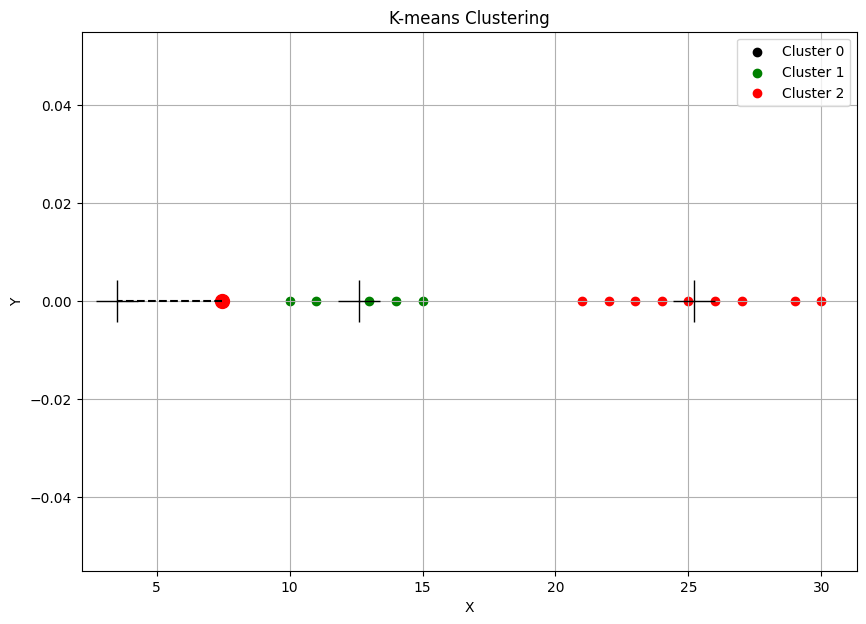

Test point belongs to centroid at: [3.5 0. ]


TestResults(failed=0, attempted=3)

In [ ]:
#Part 2a - 1
#Recreate the linear dataset from Part 1 and run Kmeans
data = np.array([[2,0],[3,0],[4,0],[5,0],[10,0],[11,0],\
              [13,0],[14,0],[15,0],[21,0],[22,0],[23,0],\
              [24,0],[25,0],[26,0],[27,0],[29,0],[30,0]])


#Instantiate Kmeans from the sklearn library
#Set the number of clusters to 3
km = KMeans(n_clusters = 3)

#Fit the model
#Save the cluster labels,  cluster centers, and inertia (performance measure)
km.fit(data)
km_labels = km.labels_
km_cluster_centers = km.cluster_centers_
km_inertia = km.inertia_

#Visualize the dataset with cluster centers and test point mapped to best cluster center
#Uses your plot_clusters function
class_coord = plot_clusters(data, km_labels, 3, km_cluster_centers)
print('Test point belongs to centroid at:', class_coord)

#Calculate the silhouette score
silhouette_score = metrics.silhouette_score(data, km_labels)


import doctest
"""
   >>> print(np.sort(np.ravel(km_cluster_centers)))
   [ 0.          0.          0.          3.5        12.6        25.22222222]
   >>> print(np.round(km_inertia, 3))
   97.756
   >>> print(np.round(metrics.silhouette_score(data, km_labels), 3))
   0.717
"""

doctest.testmod()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


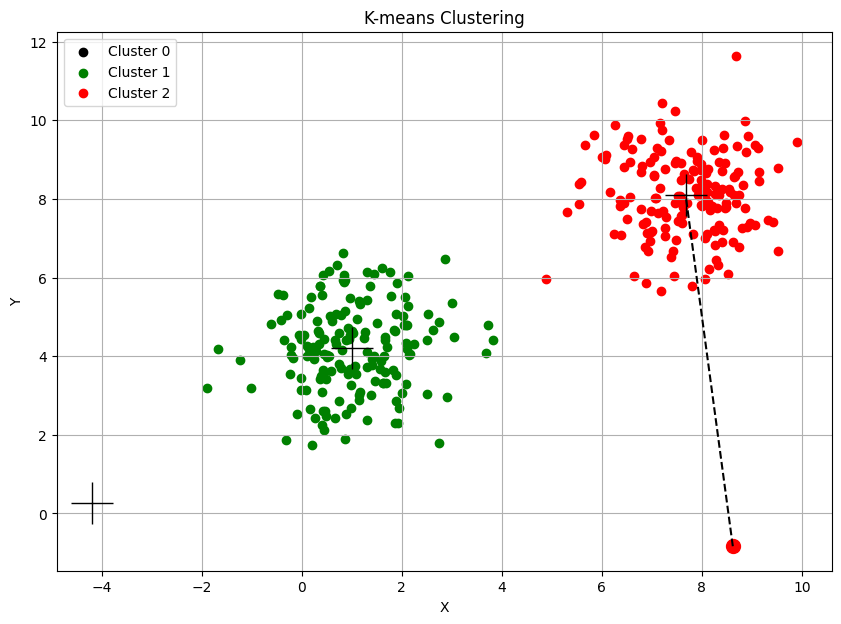

Test point belongs to centroid at: [7.67197216 8.11134342]


TestResults(failed=0, attempted=3)

In [ ]:
#Part 2a - 2
#Reconstruct a blob dataset 1
# DO NOT change the make_blob function parameters.

centers = 3
data, blob = make_blobs(n_samples=500, centers=centers, cluster_std=1, random_state=3)

#Instantiate Kmeans from the sklearn library
#Set the number of clusters to 3, and the init parameter to 'random' (random cluster center positions)
km = KMeans(n_clusters=3, init = 'random')

#Fit the model
#Save the cluster labels,  cluster centers, and inertia (performance measure)
km.fit(data)
km_labels = km.labels_
km_cluster_centers = km.cluster_centers_
km_inertia = km.inertia_

#Visualize the dataset with cluster centers and test point mapped to best cluster center
class_coord = plot_clusters(data, km_labels, 3, km_cluster_centers)
print('Test point belongs to centroid at:', class_coord)

#Calculate the silhouette score
silhouette_score = metrics.silhouette_score(data, km_labels)


import doctest
"""
   >>> print(np.sort(np.ravel(km_cluster_centers)))
   [-4.18726897  0.27543154  1.01450711  4.20318963  7.67197216  8.11134342]
   >>> print(np.round(km_inertia,3))
   1005.825
   >>> print(np.round(metrics.silhouette_score(data, km_labels), 3))
   0.732

"""

doctest.testmod()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

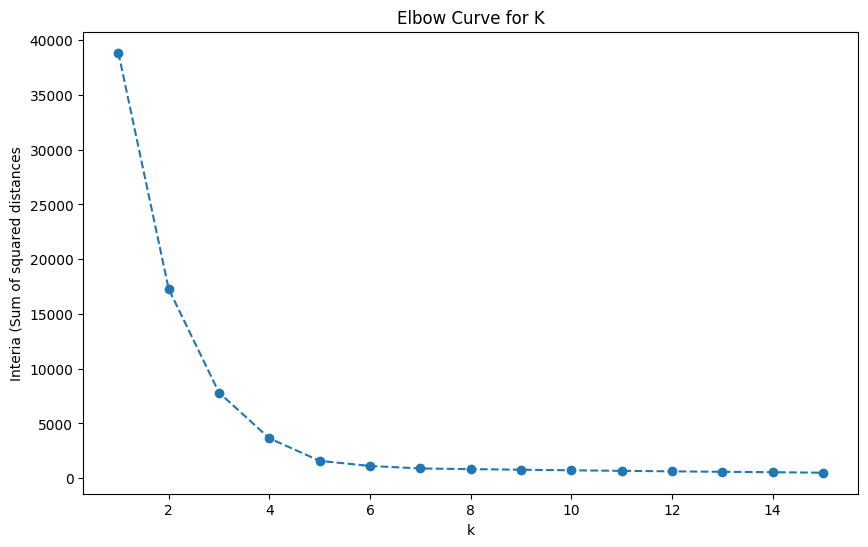

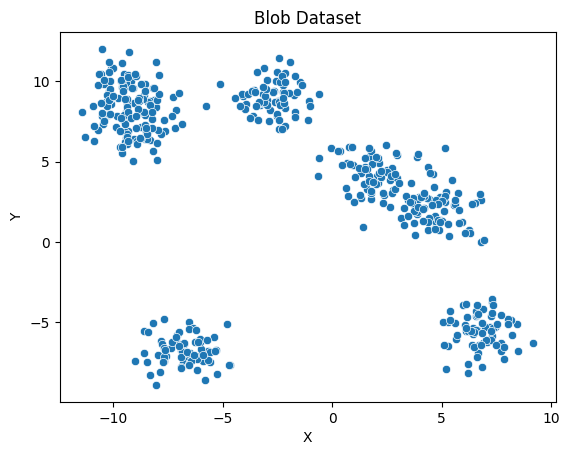

In [ ]:
#Part 2b
#Construct a blob dataset with random number of centers from [5..8] .
#Find the optimum number for K, then run Kmeans with your selected optimum K.

#Generate a random number of cluster centers, between 5 and 8 inclusive.
#(i.e. the number of clusters to generate from make_blobs)
#Generate 500 samples with standard deviation of 1.

centers = np.random.randint(5, 9)
#print('Number of centers:', centers)
data, blob = make_blobs(n_samples=500, centers=centers, cluster_std=1, random_state=42)

inertia_values = []

#Find the optimum K
#Loop over 1 to 15 clusters
#   Instantiate KMeans object
#   Fit the model
#   Save the cluster labels,  cluster centers, and inertia (performance measure)
for k in range(1,16):
    km = KMeans(n_clusters=k)
    km.fit(data)
    #km_labels = None
    #km_cluster_centers = None
    inertia_values.append(km.inertia_)

#Plot the Elbow curve
plt.figure(figsize=(10,6))
plt.plot(range(1, 16), inertia_values, marker='o', linestyle='--')
plt2.xlabel('k')
plt2.ylabel('Interia (Sum of squared distances')
plt2.title('Elbow Curve for K')
plt2.show()


#Plot your data to confirm the elbow curve with the number of clusters generated
sns.scatterplot(x=data[:,0], y=data[:,1])
plt.title('Blob Dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


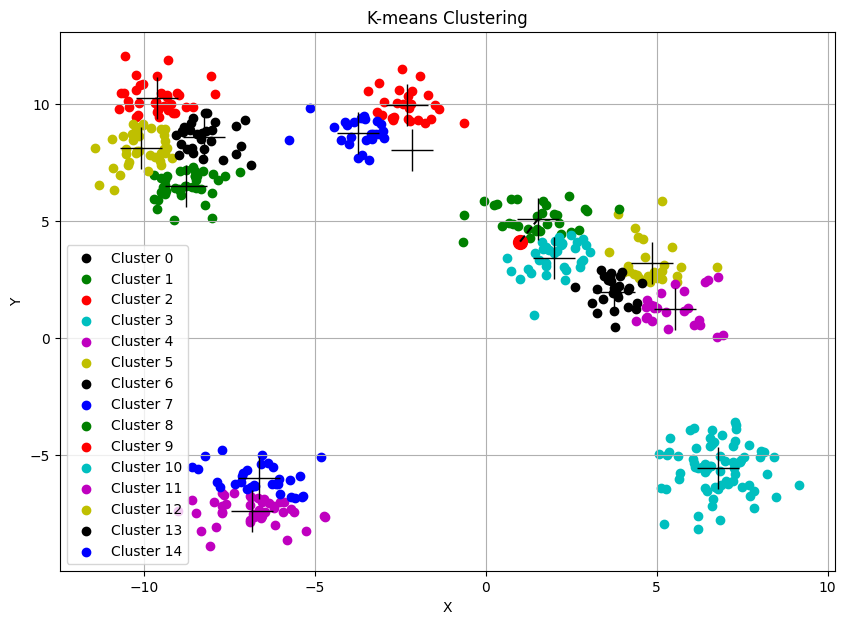

Test point belongs to centroid at: [1.53262946 5.06779568]


In [ ]:
#Now rerun with the optimium K determined above

#Instantiate Kmeans from the sklearn library
#Set the number of clusters to optimum K, and the init parameter to 'random' (random cluster center positions)
K = 15
km = KMeans(n_clusters=K, init = 'random')

#Fit the model
km.fit(data)

#Save the cluster labels,  cluster centers, and inertia (performance measure)
km_labels = km.labels_
km_cluster_centers = km.cluster_centers_
km_inertia = km.inertia_

#Visualize the dataset with cluster centers and test point mapped to best cluster center
class_coord = plot_clusters(data, km_labels, K, km_cluster_centers)
print('Test point belongs to centroid at:', class_coord)


#Calculate the silhouette score
silhouette_score = metrics.silhouette_score(data, km_labels)

**Reflect on your results**  

How did the model perform with the number of clusters found?

<br>


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


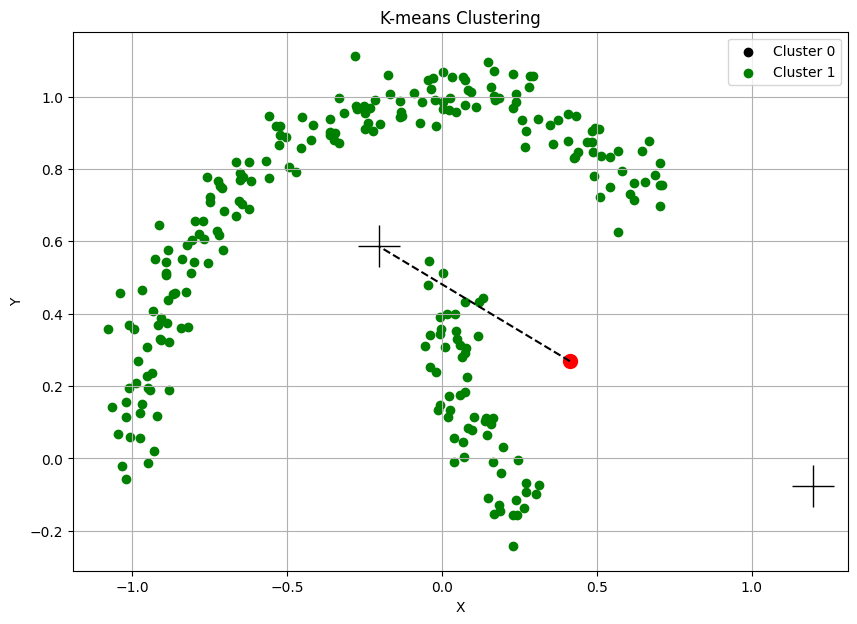

Test point belongs to centroid at: [-0.20351998  0.58579303]


TestResults(failed=0, attempted=1)

In [ ]:
#Part 2c
from sklearn import cluster, datasets, mixture
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random


#Construct a moons dataset with 500 samples and noise parameter 0.05
data, moons = make_moons(n_samples=500, noise=0.05, random_state=42)

#Instantiate Kmeans from the sklearn library
#Set the number of clusters to 2, and the init parameter to 'random' (random cluster center positions)
km = KMeans(n_clusters=2, init='random')

#Fit the model
km.fit(data)

#Save the cluster labels,  cluster centers, and inertia (performance measure)
km_labels = km.labels_
km_cluster_centers = km.cluster_centers_
km_inertia = km.inertia_

#Visualize the dataset with cluster centers and test point mapped to best cluster center
class_coord = plot_clusters(data, km_labels, 2, km_cluster_centers)
print('Test point belongs to centroid at:', class_coord)

#Calculate the silhouette score
silhouette_score = metrics.silhouette_score(data, km_labels)



import doctest
"""
   >>> print(np.round(metrics.silhouette_score(data, km_labels), 2))
   0.49

"""

doctest.testmod()


#**EXTENSION:  Kmeans++**

It is evident that in many cases the model does not perform as expected (it it does rerunning it will probably result in issues), and therefore improvements are required - these improvements can be found in a new algorithm for determining initial centroids: K-means++

We can infer two primary problems from failed examples.

If a centroid is initialized far from any groups, it is unlikely to move.
If centroids are initialized too close, they’re unlikely to diverge from one another.
We'll begin to remedy these problems with a new process of initializing the centroid locations. This new method is referred to as the k-means++ algorithm.

Initialize the first centroid as a random selection of one of the data points.
Calculate the sum of the distances between each data point and all the centroids.
Select the next centroid randomly, with a probability proportional to the total distance to the centroids.
Return to step 2. Repeat until all centroids have been initialized.

Implement a "from-scratch" implementation of K-means++ (NOT using skearn)
Run your Kmeans++ implementation on the blobs dataset that failed to cluster properly in part 1c.   
<br>

Note:  
Kmeans++ places initial centroid positions far apart from each other by assigning the first centroid to a random data point then finding the sum of all distances from points to centroids, normalizing the distances, and using those distances as the numpy.random.choice 'p' (probability) parameter which results in prioritizing the next cluster index based on the points with with the largest distances from the already assigned centroids.  The point index is then used to assign the next centroid from the data at that index.  

Hint:  see https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html    
<br>

Note:      
You should reuse your current K-means 'from-scrath' implementation for the remainder of the algorithm, EXCEPT do not include the outer iteration loop which will re-position the centroid centers (we do that as part of the Kmeans+ init so want to avoid undoing that with another random centroid coordinate placement).



In [ ]:
class KMeansplus:
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X_train):
        # Initialize the centroids, using the "k-means++" method, where a random datapoint is selected as the first,
        # then the rest are initialized w/ probabilities proportional to their distances to the first
        # Pick a random point from train data for first centroid
        self.centroids = [X_train[np.random.randint(0, len(X_train))]]
        for _ in range(1, self.n_clusters):
            # Calculate distances from points to the centroids
            dists = np.array([min([np.linalg.norm(x-c)**2 for c in self.centroids]) for x in X_train])

            # Normalize the distances
            dists = dists / dists.sum()

            # Choose remaining points based on their distances
            # Hint: https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html
            new_centroid_idx = np.random.choice(len(X_train), p=dists)
            self.centroids.append(X_train[new_centroid_idx])

        # Initialize the previous centroids to check convergence
        self.prev_centroids = np.zeros_like(self.centroids)

        for _ in range(self.max_iter):
          # Assign points to the nearest centroid
          self.labels = np.array([np.argmin([np.linalg.norm(x-c)**2 for c in self.centroids]) for x in X_train])

            # Update centroids
          for i in range(self.n_clusters):
            points = [X_train[j] for j in range(len(X_train)) if self.labels[j] == i]
            if len(points) == 0:
              self.centroids[i] = self.prev_centroids[i]
            else:
              self.centroids[i] = np.mean(points, axis=0)

            # Check for convergence
          if np.all(self.centroids == self.prev_centroids):
            break

            # Update previous centroids
          self.prev_centroids = np.copy(self.centroids)


            #From here use your from-scratch implementation of Kmeans
            #for the fit() and evaluate() functions

            #DO NOT INCLUDE YOUR OUTER ITERATION LOOP

            #YOUR CODE HERE
    def evaluate(self, X):
        #Initialize empty arrays to store the centroid index and centroid position for each of the data points
      centroids = []
      centroid_idxs = []

    #Loop of all points in X
      for point in X:
      #Calculate the distance from the data point to each of the best_centroids
      #Use your calcdist function
      #dists = None

      #Find the centroid index with the minimum distance
      #centroid_idx = None

      #Add the centroid position and index to the centroids and centroid_idxs arrays
      #centroids = None
      #centroid_idxs = None

        dists = calcdist(point, self.best_centroids)
        centroid_idx = np.argmin(dists)
        centroids.append(self.best_centroids[centroid_idx])
        centroid_idxs.append(centroid_idx)

      return centroids, centroid_idxs


It should be noted that even this new and improved algorithm will occassionally return undesirable results.